<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Data set creation
import pandas as pd
from sklearn.datasets import make_classification
# import train_test_split from sklearn.model_selection instead of sklearn.datasets
from sklearn.model_selection import train_test_split

x,y = make_classification(
    n_samples=1000, #number of samples
    n_features=20,   #total number of features
    n_informative=10, #number of informative features
    n_redundant=5, #number of redundant features
    n_classes=2, #binary claassification
    random_state=42,
    weights= [0.9, 0.1],  #imbalance in classes
    )

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


train_data = pd.DataFrame(x_train)
train_data['is_fraud'] = y_train
print(train_data.head())

          0         1         2         3         4         5         6  \
0  1.374538 -3.657092 -1.025348 -3.036520 -1.505232  0.380067  0.571103   
1  0.604890  0.957398 -2.716673 -2.838073 -3.763609  0.382034 -2.342478   
2 -0.149154  1.450720  0.422523  3.097892  3.657380  1.156804  1.126238   
3  2.598951  0.850427  0.516442  3.023884  5.616195  0.244785  0.612157   
4  2.569883 -0.804950 -3.400239 -1.217240 -2.492511  1.562355  0.888988   

          7         8         9  ...        11        12        13        14  \
0 -1.839712  3.260253 -2.913167  ...  0.237386 -0.655430 -0.770618  0.880165   
1 -2.393711  0.029055  0.768086  ...  0.472497 -1.057179  0.299672  1.251802   
2 -0.637737 -3.995119  2.053785  ... -1.790563 -2.817801 -0.240398 -0.148864   
3  0.981917 -0.363893 -2.341631  ... -5.117101  5.785080 -0.898874 -1.763126   
4 -0.878257 -3.521656 -0.708655  ...  1.050189 -4.424120  1.730518  1.261564   

         15        16        17        18        19  is_fraud  
0  6

# *** Random Forest Classifier***

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))




Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       267
           1       1.00      0.18      0.31        33

    accuracy                           0.91       300
   macro avg       0.95      0.59      0.63       300
weighted avg       0.92      0.91      0.88       300



## ***Gradient Boosting Classifer***

In [8]:

from sklearn.ensemble import GradientBoostingClassifier

#initialize gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

gb_predctions = gb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Gradient Boosting Accuracy", accuracy_score(y_test, gb_predctions))
print("Gradient Boosting Classification Report:",classification_report(y_test, gb_predctions))

Gradient Boosting Accuracy 0.93
Gradient Boosting Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96       267
           1       0.93      0.39      0.55        33

    accuracy                           0.93       300
   macro avg       0.93      0.70      0.76       300
weighted avg       0.93      0.93      0.92       300



## ***Neural Network Classifer***

In [9]:

#import some libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

#standardize the features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train) # Changed X_train to x_train
X_test_scaled = scaler.transform(x_test) # Changed X_test to x_test

#Build the neural network model
nn_model = Sequential(      #defines a model as a linear stack of layers
    [
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')     #used for binary classification, outputs probabilities between 0 and 1
    ]
)

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

#predict on test set
nn_predictions = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

#Evaluate the model
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print("Neural Network Classification Report:", classification_report(y_test, nn_predictions))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7182 - loss: 0.5766 - val_accuracy: 0.9071 - val_loss: 0.3615
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8913 - loss: 0.3539 - val_accuracy: 0.9071 - val_loss: 0.3004
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8908 - loss: 0.3025 - val_accuracy: 0.9071 - val_loss: 0.2747
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8736 - loss: 0.3030 - val_accuracy: 0.9071 - val_loss: 0.2531
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8822 - loss: 0.2593 - val_accuracy: 0.9071 - val_loss: 0.2352
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9190 - loss: 0.2217 - val_accuracy: 0.9071 - val_loss: 0.2187
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9151 - loss: 0.1935 - val_accuracy: 0.9143 - val_loss: 0.2007
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9252 - loss: 0.1948 - val_accuracy: 0.9357 - val_loss

## **Comparison**

### **Confusion Matrix**

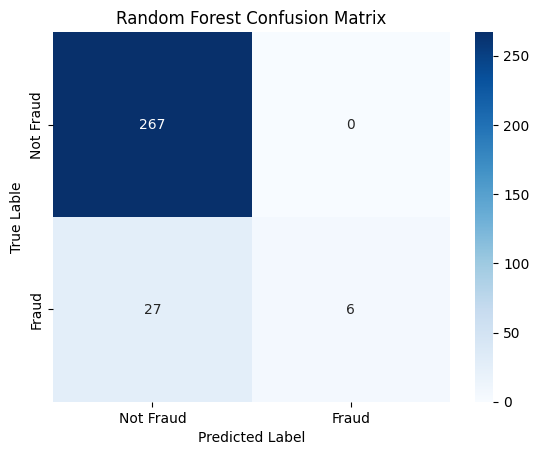

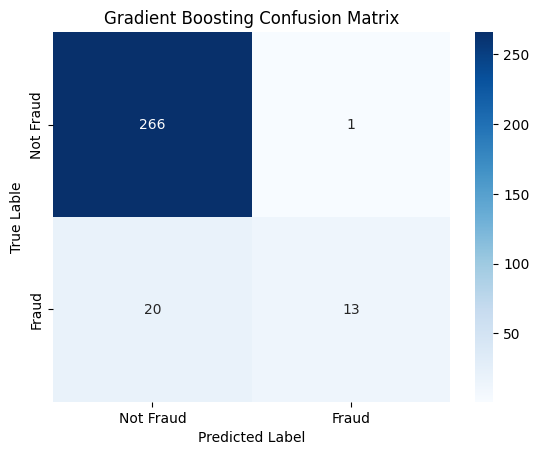

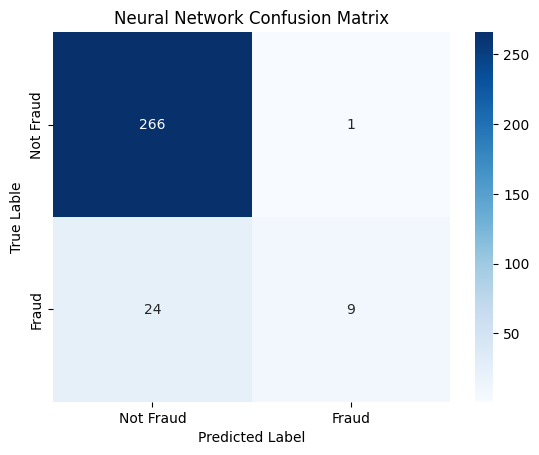

In [13]:
#import some libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Lable')
    plt.show()

plot_confusion_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, gb_predctions, 'Gradient Boosting Confusion Matrix')
plot_confusion_matrix(y_test, nn_predictions, 'Neural Network Confusion Matrix')